ex_2: solve 2D heat diffusion equation

sovle equation: $\frac{\partial u}{\partial t}=\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}$ using finite differencme method

given computing domain: $x\in[0,1],y\in[0,1]$, and initial value: $u|_{x=0.5,y=0.5,t=0}=100$

Step 1: import necessary libs

In [277]:
using Plots

Step 2: define variables

In [278]:
dx = 0.5; dy = 0.5;

In [279]:
dt = 0.05;

In [280]:
x=Float64[0;1:100]/100.0;

In [281]:
y=Float64[0;1:100]/100.0;

In [282]:
u=zeros(101,101);u[51,51]=100;

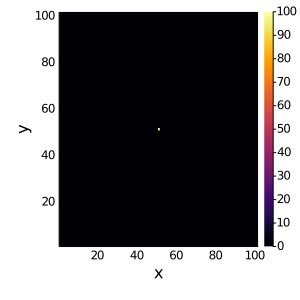

In [283]:
heatmap(u,size=(300,300),xlabel="x",ylabel="y")

Step 3: calculate derivatives

scheme of $\frac{\partial u}{\partial x}=\frac{u_{i,j+1}-u_{i,j}}{dx}$

In [284]:
dudx=zeros(100,100);
for i=1:100
    for j=1:100
        dudx[i,j]=(u[i,j+1]-u[i,j])/dx
    end
end

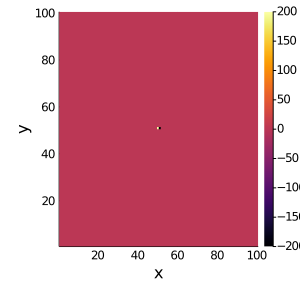

In [285]:
heatmap(dudx,size=(300,300),xlabel="x",ylabel="y")

scheme of $\frac{\partial u}{\partial y}=\frac{u_{i+1,j}-u_{i,j}}{dx}$

In [286]:
dudy=zeros(100,100);
for i=1:100
    for j=1:100
        dudy[i,j]=(u[i+1,j]-u[i,j])/dy
    end
end

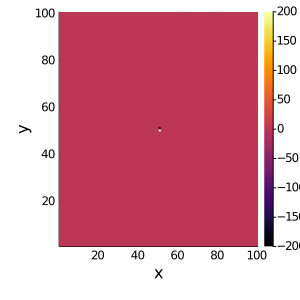

In [287]:
heatmap(dudy,size=(300,300),xlabel="x",ylabel="y")

scheme of $\frac{\partial^2 u}{\partial x^2}=\frac{{\partial u/dx}_{i,j+1}-{\partial u/dx}_{i,j}}{dx}=\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{dx^2}$

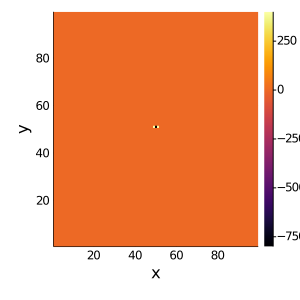

In [288]:
d2udx2=zeros(99,99);
for i=1:99
    for j=1:99
        d2udx2[i,j]=(dudx[i,j+1]-dudx[i,j])/dx
    end
end
heatmap(d2udx2,size=(300,300),xlabel="x",ylabel="y")

scheme of $\frac{\partial^2 u}{\partial y^2}=\frac{{\partial u/dy}_{i+1,j}-{\partial u/dy}_{i,j}}{dy}=\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{dy^2}$

In [289]:
println(d2udx2[51,:])

println(d2udx2[51,49])
println(d2udx2[51,50])
println(d2udx2[51,51])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 400.0, -800.0, 400.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
400.0
-800.0
400.0


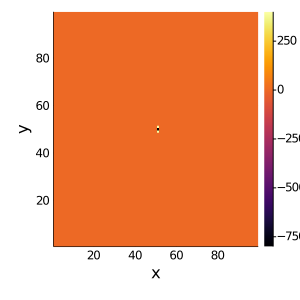

In [290]:
d2udy2=zeros(99,99);
for i=1:99
    for j=1:99
        d2udy2[i,j]=(dudy[i+1,j]-dudy[i,j])/dy
    end
end
heatmap(d2udy2,size=(300,300),xlabel="x",ylabel="y")

In [291]:
println(d2udy2[:,51]);

println(d2udy2[49,51]);
println(d2udy2[50,51]);
println(d2udy2[51,51]);


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 400.0, -800.0, 400.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
400.0
-800.0
400.0


Step 4: time marching

scheme of $\frac{\partial u}{\partial t}=\frac{u^{n+1}-u^{n}}{dt}=\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{dx^2}+\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{dy^2}$

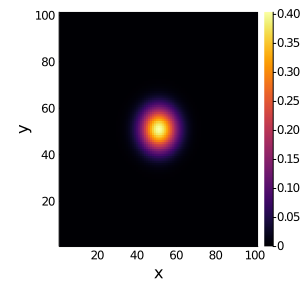

In [297]:
u_new=copy(u);
dudx_new=copy(dudx);
dudy_new=copy(dudy);
d2udx2_new=copy(d2udx2);
d2udy2_new=copy(d2udy2);

for t=2:99
    for i=1:98
        for j=1:98
            u_new[i+1,j+1]=d2udx2_new[i+1,j]*dt+u_new[i+1,j+1]
            u_new[i+1,j+1]=d2udy2_new[i,j+1]*dt+u_new[i+1,j+1]
        end
    end
   
    for i=1:100
        for j=1:100
            dudx_new[i,j]=(u_new[i,j+1]-u_new[i,j])/dx
            dudy_new[i,j]=(u_new[i+1,j]-u_new[i,j])/dy
        end
    end
    for i=1:99
        for j=1:99
            d2udx2_new[i,j]=(dudx_new[i,j+1]-dudx_new[i,j])/dx
            d2udy2_new[i,j]=(dudy_new[i+1,j]-dudy_new[i,j])/dy
        end
    end
end
heatmap(u_new,size=(300,300),xlabel="x",ylabel="y")